In [1]:
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow.keras.datasets.mnist as mnist

In [3]:
(train_image,train_label),(test_image,test_label) = mnist.load_data()

In [4]:
train_image.shape

(60000, 28, 28)

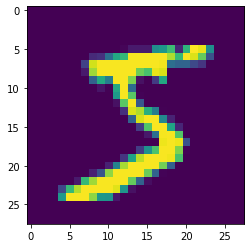

In [5]:
plt.imshow(train_image[0])

In [6]:
train_label[0]

5

In [7]:
model=keras.Sequential()

In [8]:
model.add(layers.Flatten()) #从(60000,28,28) → (60000,28*28)2

In [9]:
model.add(layers.Dense(64,activation='relu'))

In [10]:
model.add(layers.Dense(10,activation='softmax'))

In [11]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])

In [12]:
model.fit(train_image,train_label,epochs=50,batch_size=512) 
#计算机每batch计算力有限，限制每次训练的数量512张，所有图片训练50次
#batch过小会导致模型误差大，无法识别到特例引起的误差

Epoch 1/50
118/118 [==============================] - 0s 4ms/step - loss: 12.0620 - acc: 0.7499
Epoch 2/50
118/118 [==============================] - 0s 3ms/step - loss: 1.5602 - acc: 0.8266
Epoch 3/50
118/118 [==============================] - 0s 3ms/step - loss: 0.8094 - acc: 0.8486
Epoch 4/50
118/118 [==============================] - 0s 3ms/step - loss: 0.6082 - acc: 0.8724
Epoch 5/50
118/118 [==============================] - 0s 3ms/step - loss: 0.5062 - acc: 0.8867
Epoch 6/50
118/118 [==============================] - 0s 3ms/step - loss: 0.4259 - acc: 0.9014
Epoch 7/50
118/118 [==============================] - 0s 3ms/step - loss: 0.3736 - acc: 0.9098
Epoch 8/50
118/118 [==============================] - 0s 3ms/step - loss: 0.3306 - acc: 0.9180
Epoch 9/50
118/118 [==============================] - 0s 3ms/step - loss: 0.2979 - acc: 0.9244
Epoch 10/50
118/118 [==============================] - 0s 3ms/step - loss: 0.2695 - acc: 0.9294
Epoch 11/50
118/118 [===========================

In [13]:
model.evaluate(test_image,test_label)

313/313 [==============================] - 0s 562us/step - loss: 0.3263 - acc: 0.9525


[0.32629501819610596, 0.9524999856948853]

In [14]:
import numpy as np

In [15]:
np.argmax(model.predict(test_image[:10]),axis=1) #argmax输出每个列表中最大值的索引值

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=int64)

In [16]:
test_label[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

#模型优化

In [17]:
model=keras.Sequential()
model.add(layers.Flatten()) #从(60000,28,28) → (60000,28*28)
model.add(layers.Dense(512,activation='relu'))
model.add(Dropout(0.05))
model.add(layers.Dense(400,activation='relu'))
model.add(Dropout(0.05))
model.add(layers.Dense(320,activation='relu'))
model.add(Dropout(0.05))
model.add(layers.Dense(256,activation='relu'))
model.add(Dropout(0.05))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [18]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])

In [19]:
model.fit(train_image,train_label,epochs=50,batch_size=512, validation_data=(test_image,test_label)) 

Epoch 1/50
118/118 [==============================] - 3s 29ms/step - loss: 1.4881 - acc: 0.7128 - val_loss: 0.2361 - val_acc: 0.9328
Epoch 2/50
118/118 [==============================] - 3s 27ms/step - loss: 0.2421 - acc: 0.9313 - val_loss: 0.1695 - val_acc: 0.9519
Epoch 3/50
118/118 [==============================] - 3s 25ms/step - loss: 0.1605 - acc: 0.9539 - val_loss: 0.1294 - val_acc: 0.9641
Epoch 4/50
118/118 [==============================] - 3s 26ms/step - loss: 0.1204 - acc: 0.9648 - val_loss: 0.1083 - val_acc: 0.9684
Epoch 5/50
118/118 [==============================] - 3s 26ms/step - loss: 0.0919 - acc: 0.9728 - val_loss: 0.1026 - val_acc: 0.9711
Epoch 6/50
118/118 [==============================] - 3s 26ms/step - loss: 0.0770 - acc: 0.9770 - val_loss: 0.0985 - val_acc: 0.9721
Epoch 7/50
118/118 [==============================] - 3s 26ms/step - loss: 0.0606 - acc: 0.9810 - val_loss: 0.1025 - val_acc: 0.9727
Epoch 8/50
118/118 [==============================] - 3s 26ms/step - 

In [20]:
model.evaluate(test_image,test_label)

313/313 [==============================] - 1s 2ms/step - loss: 0.1091 - acc: 0.9798A: 0s - loss: 0.1095 - acc: 0.97


[0.10908444970846176, 0.9797999858856201]